In [ ]:
import os
from google.colab import drive


drive.mount('/content/drive', force_remount=True)

os.chdir('drive/MyDrive/EMNIST/')
os.listdir()

Mounted at /content/drive


['emnist-byclass-train.csv',
 'emnist-balanced-test.csv',
 'emnist-letters-test.csv',
 'emnist-balanced-train.csv',
 'emnist-letters-train.csv',
 'emnist-byclass-test.csv',
 'mapping.csv',
 'emnist-balanced-mapping.txt',
 'emnist-byclass-mapping.txt',
 'handwritten-a-500x500.png',
 'handwritten-a-28x28.png',
 'handwritten-b-28x28.png',
 'handwritten-c-28x28.png',
 'binary_best_handwriten_character_model.hdf5',
 'best_handwriten_character_model.hdf5']

In [ ]:
import pandas as pd

train_images = pd.read_csv("emnist-balanced-train.csv", header=None)
test_images = pd.read_csv("emnist-balanced-test.csv", header=None)
map_images = pd.read_csv("emnist-balanced-mapping.txt", header=None) 

In [ ]:
import pandas as pd

train_images = pd.read_csv("emnist-letters-train.csv", header=None)
test_images = pd.read_csv("emnist-letters-test.csv", header=None)
map_images = pd.read_csv("emnist-letters-mapping.txt", header=None) 

a


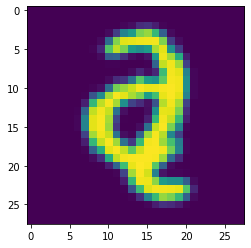

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


print(chr(97)) 
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28))))
plt.show()

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
a
b
d
e
f
g
h
n
q
r
t




n:


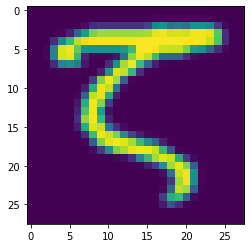

In [ ]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# The labels present in our dataset
for i in ascii_map: 
  print(chr(int(i)))

print("\n\n\n")
print(f"{chr(int(ascii_map[train_y[2]]))}:")
plt.imshow(train_x[2].reshape(28, 28))
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  32 113 113  32   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4 115 241 241 113   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  22 172 250 247 127   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   2  82 229 192 170 107   3   0   0   3  16  25  36  20   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   9 139 245 130  25  18   0   1  22  83 159 184 214 158  36   3
    0   0   0   0   0   0   0   0   0   0]
 [  0   0  32 204 249 127   4   0   1  47 159 232 250 249 252 24

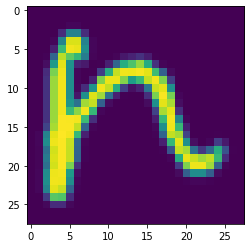

In [ ]:
import numpy as np

# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.
def rot_flip(image):
  image = image.reshape([28, 28])
  image = np.fliplr(image)
  image = np.rot90(image)
  #np.place(image, image > 0, 255)
  return image



train_x = np.apply_along_axis(rot_flip, 1, train_x)
test_x = np.apply_along_axis(rot_flip, 1, test_x)

print(train_x[2])

plt.imshow(train_x[2])
plt.show()


In [ ]:
# train_x = train_x.astype('float32')
# train_x = train_x / 255.0

# test_x = test_x.astype('float32')
# test_x = test_x / 255.0

# train_x = train_x.reshape(-1, 28, 28, 1)   #Equivalent to (112800,28,28,1)
# test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

print(train_x.shape)

(112800, 28, 28)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation ='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47, activation='softmax'))

model.compile(optimizer = 'adam', loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

Epoch 1/1000000000000
3525/3525 [==============================] - 312s 88ms/step - loss: 2.2524 - accuracy: 0.3863 - val_loss: 0.7254 - val_accuracy: 0.7749
Epoch 2/1000000000000
3525/3525 [==============================] - 307s 87ms/step - loss: 1.0254 - accuracy: 0.6749 - val_loss: 0.5330 - val_accuracy: 0.8253
Epoch 3/1000000000000
3525/3525 [==============================] - 312s 88ms/step - loss: 0.8272 - accuracy: 0.7328 - val_loss: 0.4786 - val_accuracy: 0.8407
Epoch 4/1000000000000
3525/3525 [==============================] - 314s 89ms/step - loss: 0.7333 - accuracy: 0.7611 - val_loss: 0.4740 - val_accuracy: 0.8432
Epoch 5/1000000000000
3525/3525 [==============================] - 321s 91ms/step - loss: 0.6737 - accuracy: 0.7796 - val_loss: 0.4494 - val_accuracy: 0.8507
Epoch 6/1000000000000
3525/3525 [==============================] - 314s 89ms/step - loss: 0.6326 - accuracy: 0.7907 - val_loss: 0.4318 - val_accuracy: 0.8569
Epoch 7/1000000000000
3525/3525 [===================

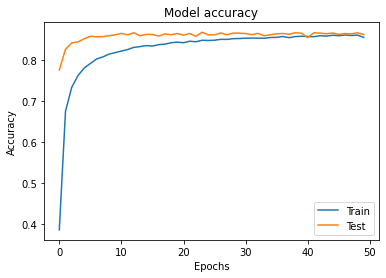

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


monitor_val_acc = EarlyStopping(monitor = 'accuracy', patience = 3)
modelCheckpoint = ModelCheckpoint('best_handwriten_character_model.hdf5', save_best_only = True)

results = model.fit(
    train_x,
    train_y,
    callbacks = [monitor_val_acc, modelCheckpoint],
    validation_data = (test_x, test_y),
    epochs = 1000000,
)

plt.figure()
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
from keras.models import load_model


model = load_model('best_handwriten_character_model.hdf5')

In [ ]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character

ascii_map.head(len(ascii_map.index))

,0,Character
0,48,0
1,49,1
2,50,2
3,51,3
4,52,4
5,53,5
6,54,6
7,55,7
8,56,8
9,57,9


[[  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.     ]
 [  0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        

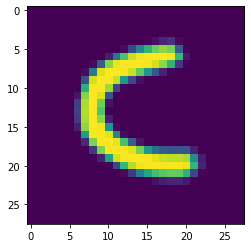

In [ ]:
from keras.preprocessing import image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = image.load_img("handwritten-c-28x28.png", target_size=(28,28))
x = image.img_to_array(img)

gray_image = cv.cvtColor(x, cv.COLOR_BGR2GRAY)

# white background black text
#np.place(gray_image, gray_image == 255, 0)
#np.place(gray_image, gray_image != 0, 255)

# black background white text
#np.place(gray_image, gray_image > 0, 255)

print(gray_image)

plt.imshow(gray_image)

gray_image = gray_image.reshape(1, 28, 28, 1)
print(gray_image.shape)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ", ascii_map["Character"][cl.index(max(cl))])